In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%run read&clean.ipynb
%run Jean.ipynb

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

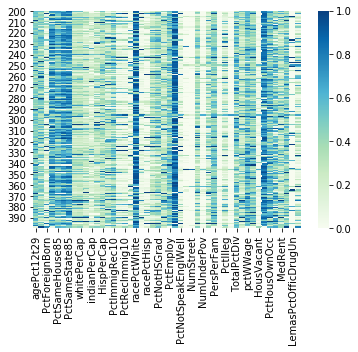

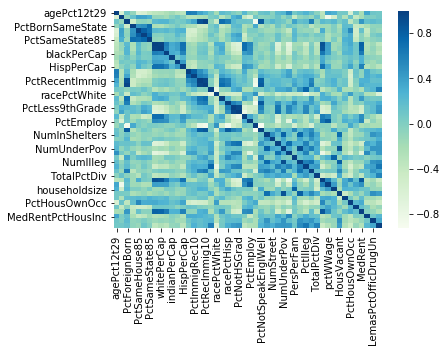

PctForeignBorn PctRecentImmig
PctForeignBorn PctRecImmig10
PctForeignBorn PctNotSpeakEnglWell
PctSameHouse85 PctSameCity85
PctSameCity85 PctSameHouse85
perCapInc whitePerCap
perCapInc medIncome
whitePerCap perCapInc
whitePerCap medIncome
PctImmigRecent PctImmigRec10
PctImmigRec10 PctImmigRecent
PctRecentImmig PctForeignBorn
PctRecentImmig PctRecImmig10
PctRecImmig10 PctForeignBorn
PctRecImmig10 PctRecentImmig
PctRecImmig10 PctNotSpeakEnglWell
racePctHisp PctNotSpeakEnglWell
PctLess9thGrade PctNotHSGrad
PctNotHSGrad PctLess9thGrade
PctEmploy pctWWage
PctNotSpeakEnglWell PctForeignBorn
PctNotSpeakEnglWell PctRecImmig10
PctNotSpeakEnglWell racePctHisp
NumUnderPov NumIlleg
NumUnderPov HousVacant
NumIlleg NumUnderPov
NumIlleg HousVacant
medIncome perCapInc
medIncome whitePerCap
medIncome MedRent
pctWWage PctEmploy
HousVacant NumUnderPov
HousVacant NumIlleg
MedRent medIncome


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

list_correlation = ['fold','agePct12t29', 'agePct65up', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'perCapInc', 'whitePerCap', 'blackPerCap','indianPerCap', 'AsianPerCap', 'HispPerCap', 'PctImmigRecent', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig10', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctEmploy', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'NumInShelters', 'NumStreet', 'PctUnemployed', 'NumUnderPov', 'PctPopUnderPov', 'PersPerFam', 'NumIlleg', 'PctIlleg', 'NumImmig', 'TotalPctDiv','medIncome', 'pctWWage', 'householdsize', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'MedYrHousBuilt', 'MedRent', 'MedRentPctHousInc', 'LemasPctOfficDrugUn', 'ViolentCrimesPerPop']
correlation_df = pd.DataFrame()

for i in range(0, len(list_correlation)):
    if list_correlation[i] not in df_clean_columns:
        list_correlation.remove(df_clean_columns[i])
correlation_df = df_clean[list_correlation]

for j in range (0, len(list_correlation)):
    if type(correlation_df[list_correlation[j]][1]) is not float:
        print(list_correlation[j])
        

correlation_df_fold_1 = correlation_df[correlation_df['fold']==1]
correlation_df_fold_1 = correlation_df_fold_1.drop(columns = 'fold')
correlation_df_fold_1 = correlation_df_fold_1.astype(float).corr()

correlation_df_fold_2 = correlation_df[correlation_df['fold']==2]
correlation_df_fold_2 = correlation_df_fold_2.drop(columns = 'fold')
correlation_df_fold_2 = correlation_df_fold_2.astype(float)

df_fold_3 = correlation_df[correlation_df['fold']==3]
df_fold_3 = df_fold_3.drop(columns = 'fold')

#Simple heatmap

sns.heatmap(correlation_df_fold_2, cmap = 'GnBu')
plt.show()

#Heatmap of correlation coefficient 
sns.heatmap(correlation_df_fold_1, cmap = 'GnBu')
plt.show()

#Identify higher correlation coefficent

columns = correlation_df_fold_1.columns
for i in range (0, len(columns)):
    for j in range(0, len(correlation_df_fold_1)):
        if (correlation_df_fold_1[columns[i]][j] > 0.8) & (correlation_df_fold_1[columns[i]][j] != 1):
            print(columns[i], columns[j])

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_fold_3)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
target = df_fold_3.columns
finalDf = pd.concat([principalDf, pd.DataFrame(target)], axis=1)
finalDf['target'] = finalDf[finalDf.columns[2]]
finalDf = finalDf.drop(finalDf.columns[2],axis=1)
print(finalDf)

     principal component 1  principal component 2               target
0                 0.485653              -0.518277          agePct12t29
1                 1.039866              -0.115782           agePct65up
2                 0.354473              -0.510943       PctForeignBorn
3                 0.891906               0.657951     PctBornSameState
4                 0.739834               0.568988       PctSameHouse85
5                 1.122907               0.615663        PctSameCity85
6                -0.184252              -0.291936       PctSameState85
7                 0.787629              -0.080296            perCapInc
8                 0.690920              -0.446963          whitePerCap
9                -0.525485               0.745233          blackPerCap
10                1.504280              -0.086121         indianPerCap
11                0.303574               0.158868          AsianPerCap
12                0.046127              -0.595083           HispPerCap
13    

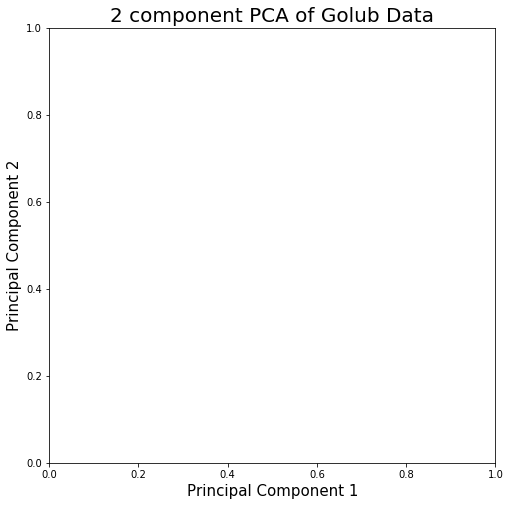

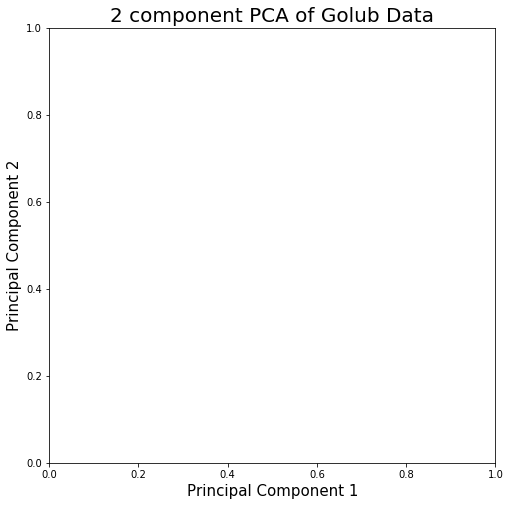

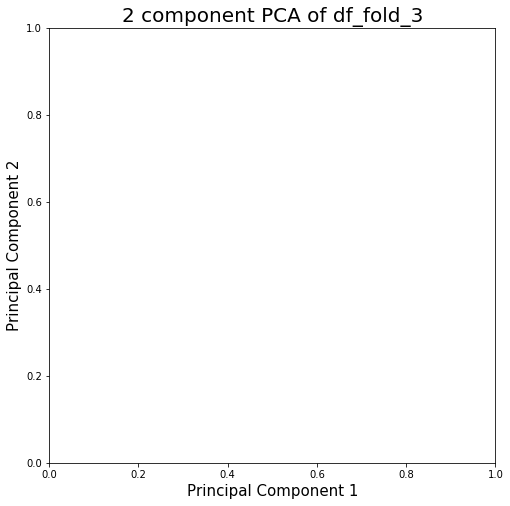

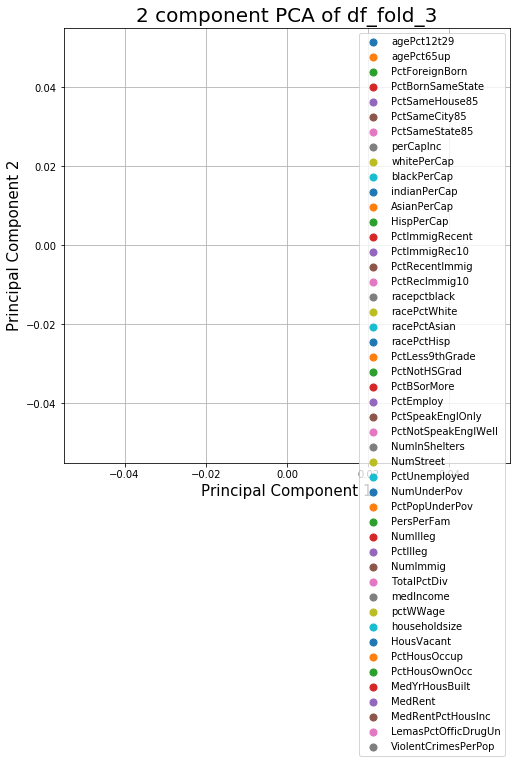

In [74]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA of df_fold_3', fontsize = 20)
targets = target
for target in zip(targets):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()